LOAN APPROVAL PREDICTION 

In [340]:
import pandas as pd 
import numpy as np 
import pickle 
from sklearn.metrics import accuracy_score
train=pd.read_csv("loan_approval_dataset.csv")

In [341]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [342]:
print("Unique values of Education:",train.iloc[:,2].unique())
print("Unique values of Self employed:",train.iloc[:,3].unique())
print("Unique values of Loan Status:",train.iloc[:,12].unique())

Unique values of Education: [' Graduate' ' Not Graduate']
Unique values of Self employed: [' No' ' Yes']
Unique values of Loan Status: [' Approved' ' Rejected']


In [343]:
train

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# EDA

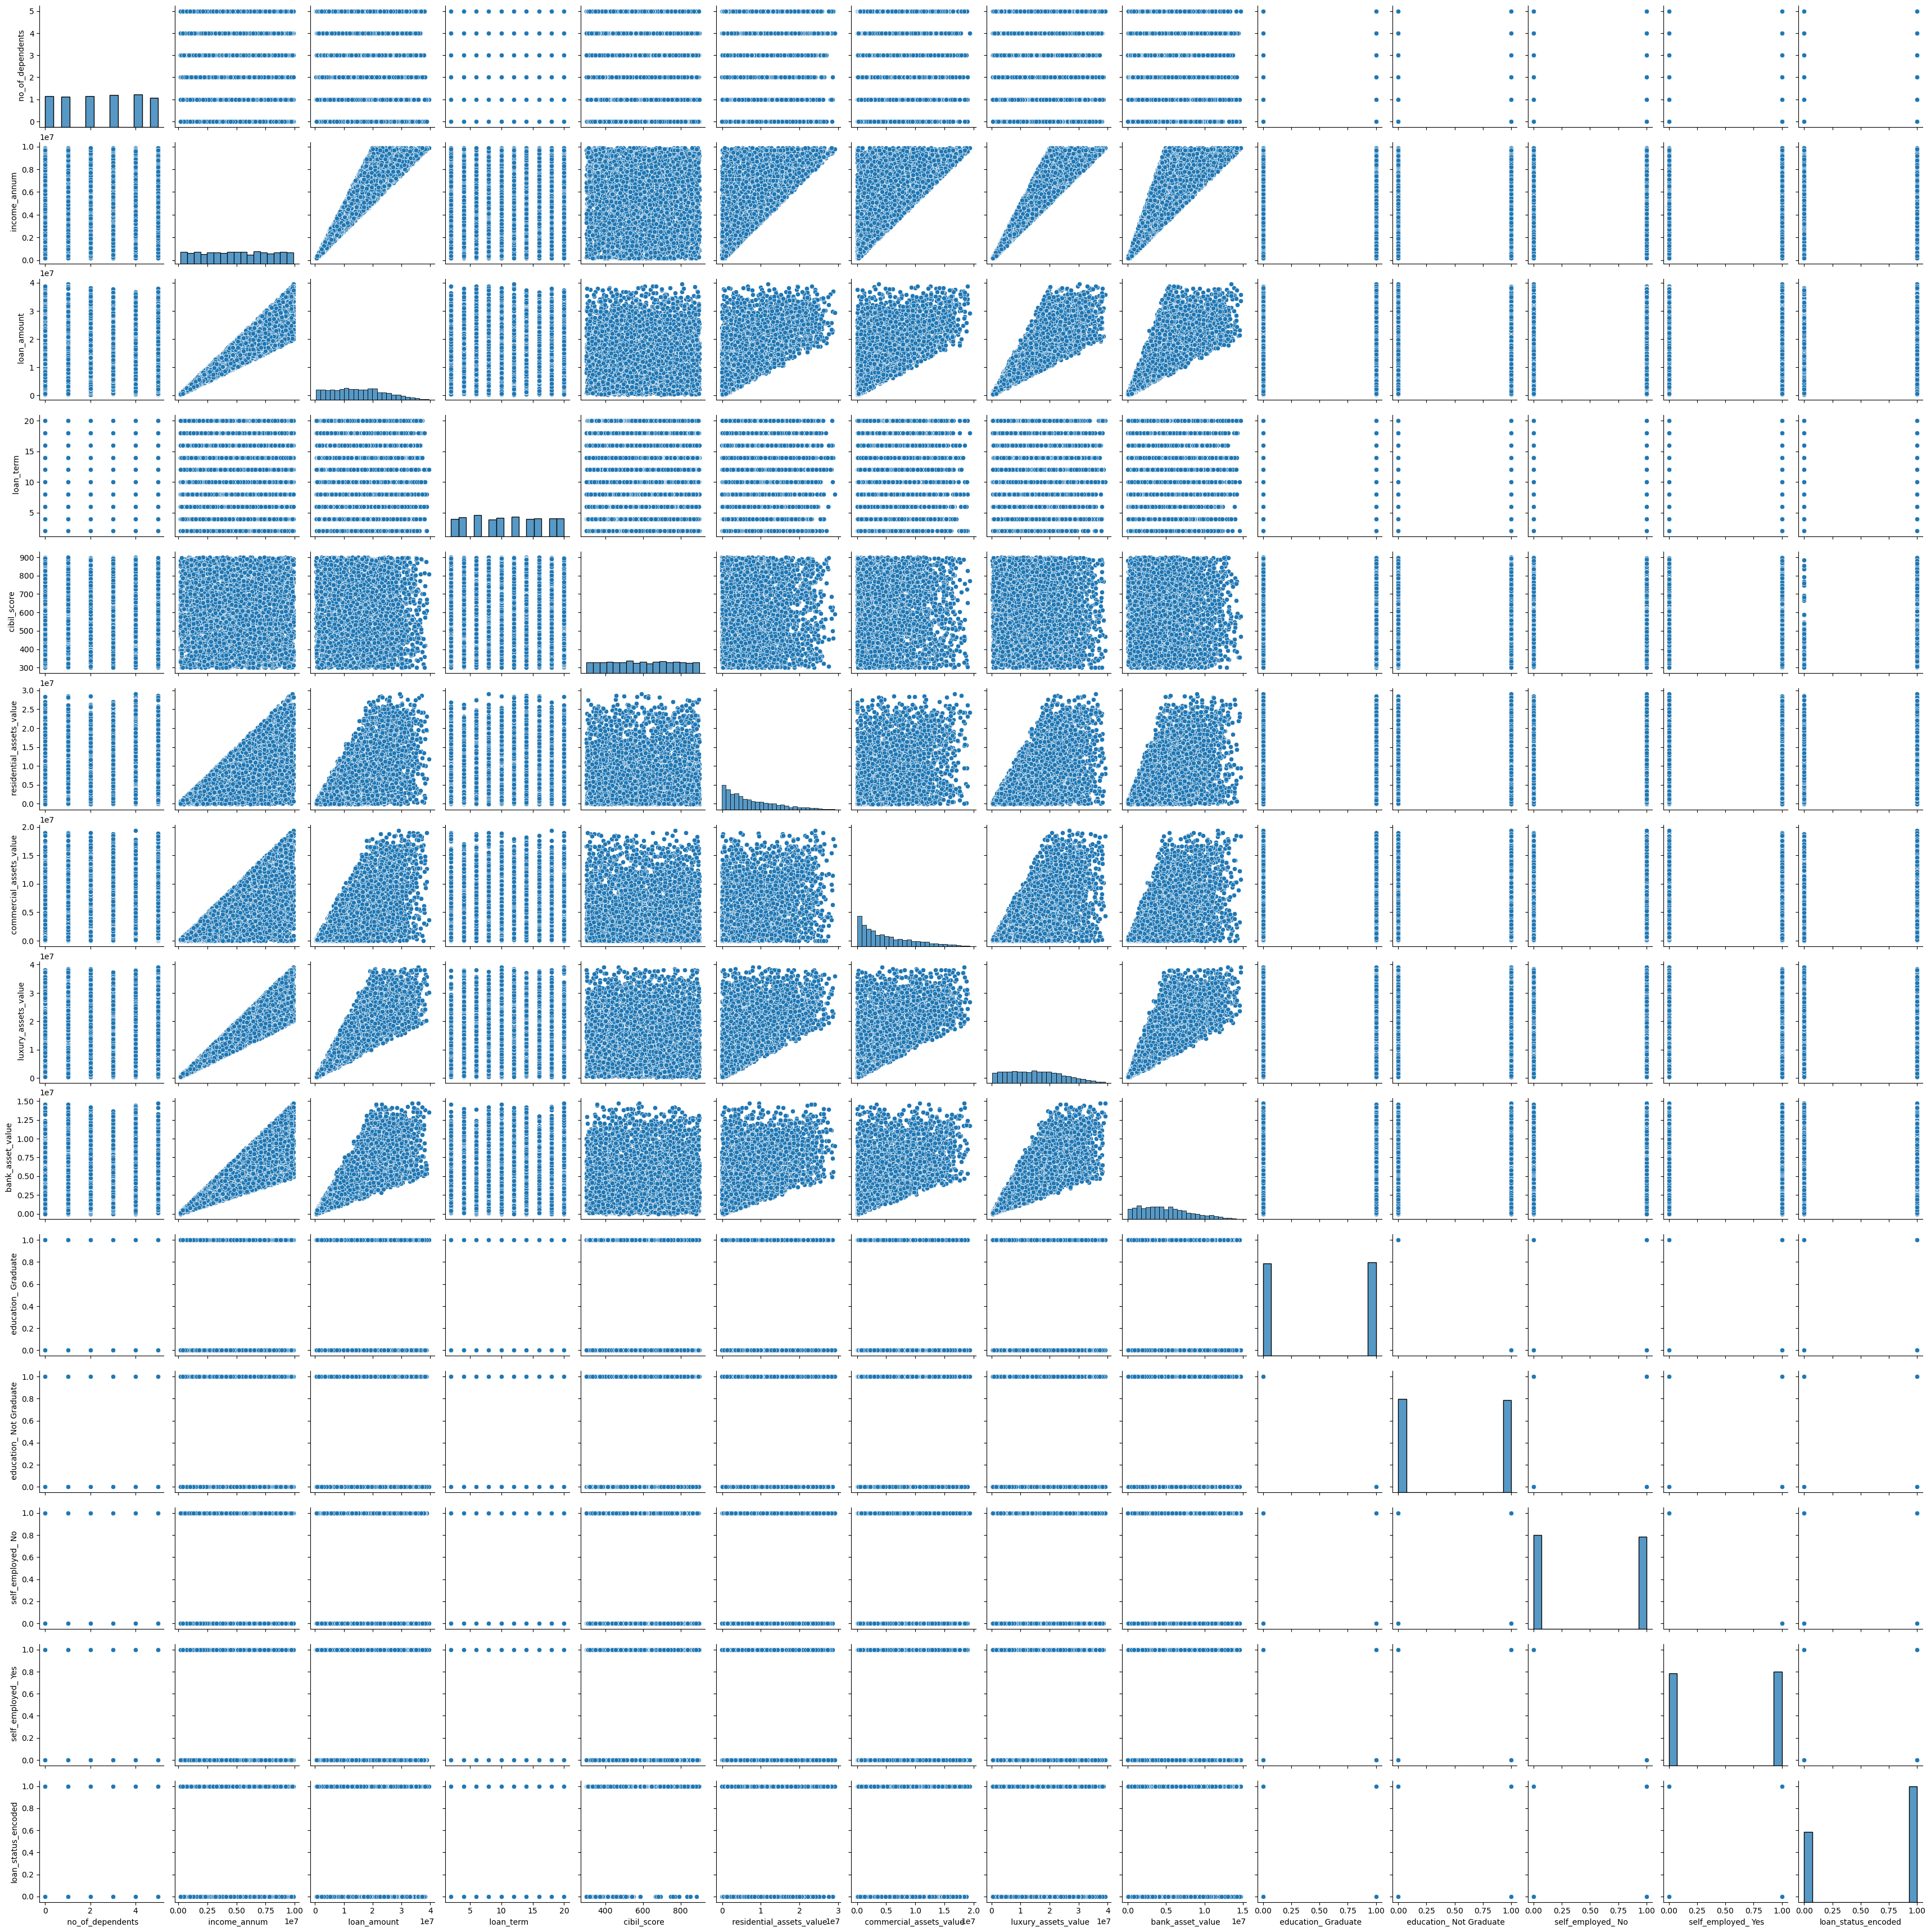

In [455]:
import seaborn as sns 
sns.pairplot(train)

In [345]:
train.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [346]:
train=train.drop(columns=['loan_id'])

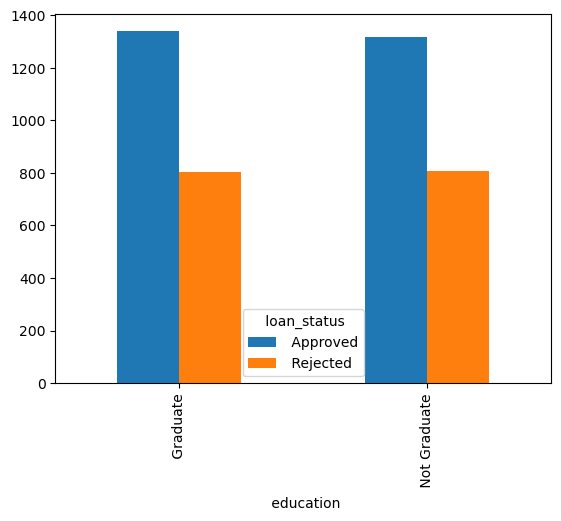

In [347]:
#checking the correlation between the proportion of Graduated vs Not Graduated who received approval for their loan
import matplotlib.pyplot as plt
pd.crosstab(train[" education"],train[" loan_status"]).plot(kind='bar')
plt.show()

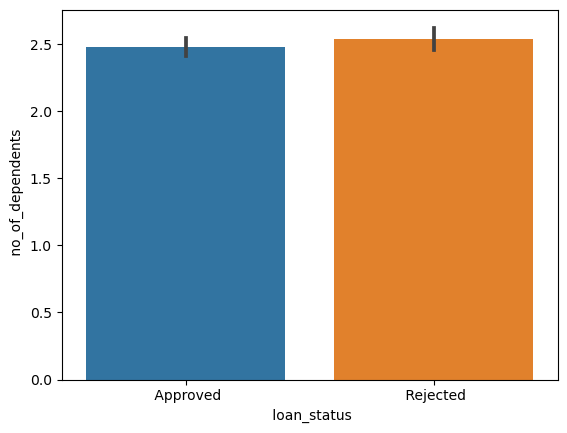

In [348]:
#checking the correlation between the loan_status wrt the no_of_dependents

sns.barplot(x=train[' loan_status'],y=train[' no_of_dependents'])
plt.show()

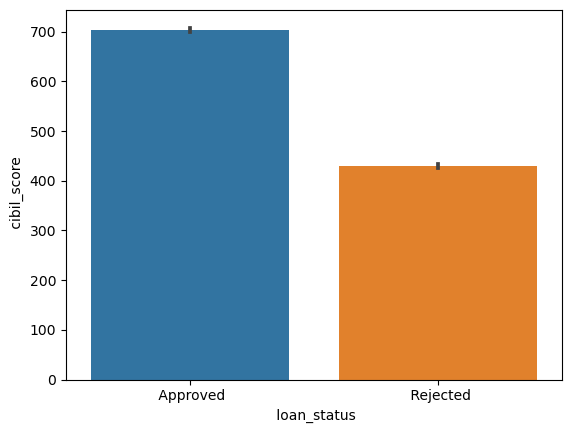

In [349]:
#checking the correlation between the loan_status wrt the cibil_score

sns.barplot(x=train[' loan_status'],y=train[' cibil_score'])
plt.show()

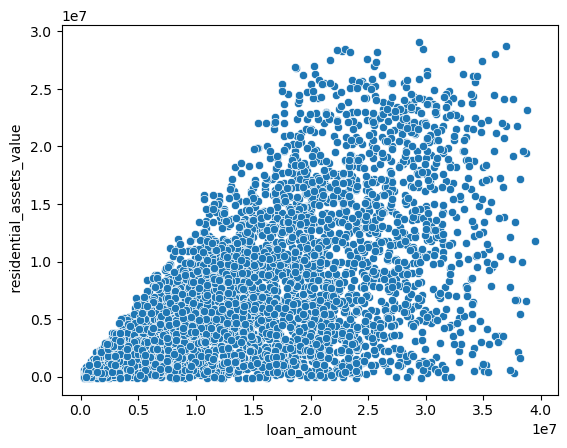

In [350]:
#checking the correlation between the loan_amount wrt the residential_assets_value
sns.scatterplot(x=train[" loan_amount"],y=train[" residential_assets_value"])
plt.show()

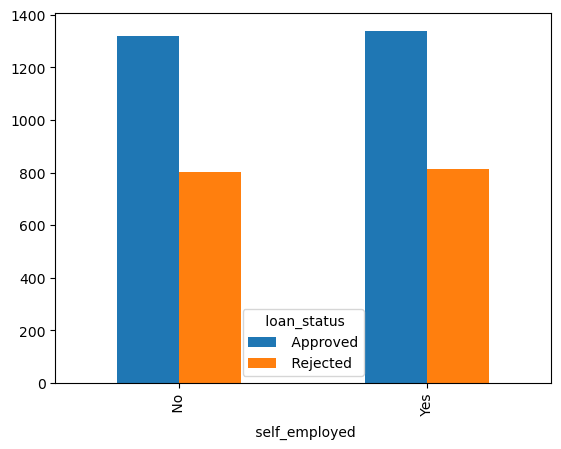

In [351]:
#checking the correlation between the proportion of applicants who are self employed wrt the approval for the loan
pd.crosstab(train[" self_employed"],train[" loan_status"]).plot(kind="bar")
plt.show()

# PREPROCESSING

In [352]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
one_hot_encoded=encoder.fit_transform(train[[' education',' self_employed']])
new_cols=pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out([' education',' self_employed']))
train=pd.concat([train,new_cols],axis=1)
train.drop(columns=[' education',' self_employed'],inplace=True)

In [353]:
train['loan_status_encoded']=np.where(train[' loan_status']==" Rejected",0,1)

In [354]:
train

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status_encoded
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,1.0,0.0,1.0,0.0,1
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,0.0,1.0,0.0,1.0,0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,1.0,0.0,1.0,0.0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,1.0,0.0,1.0,0.0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,1.0,0.0,0.0,1.0,0
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,0.0,1.0,0.0,1.0,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,0.0,1.0,1.0,0.0,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,0.0,1.0,1.0,0.0,1


In [355]:
#finding the correlation between features towards the target feature
correlation=train.corr()
correlation["loan_status_encoded"].sort_values(ascending=False)

C:\Users\palan\AppData\Local\Temp\ipykernel_41276\2414079610.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=train.corr()


loan_status_encoded          1.000000
 cibil_score                 0.770518
 loan_amount                 0.016150
 commercial_assets_value     0.008246
 education_ Graduate         0.004918
 self_employed_ Yes          0.000345
 self_employed_ No          -0.000345
 education_ Not Graduate    -0.004918
 bank_asset_value           -0.006778
 residential_assets_value   -0.014367
 income_annum               -0.015189
 luxury_assets_value        -0.015465
 no_of_dependents           -0.018114
 loan_term                  -0.113036
Name: loan_status_encoded, dtype: float64

In [408]:
#assigning X and y
X=train[[" loan_term"," cibil_score"]].values
y=train[" loan_status"]

In [409]:
#Train test splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [410]:
X_test.shape

(854, 2)

In [411]:
train[' loan_term']

0       12
1        8
2       20
3        8
4       20
        ..
4264    12
4265    20
4266    18
4267     8
4268    10
Name:  loan_term, Length: 4269, dtype: int64

In [412]:
train[' cibil_score']

0       778
1       417
2       506
3       467
4       382
       ... 
4264    317
4265    559
4266    457
4267    780
4268    607
Name:  cibil_score, Length: 4269, dtype: int64

USING OPTUNA

In [426]:
import optuna

In [439]:
#OPTUNA CONFIG FOR RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
def objective(trail,data=X,target=y):
    param={
        "n_estimators":trail.suggest_categorical('n_estimators',[100,300,500]),
        "max_depth":trail.suggest_categorical("max_depth",[4,8,16,32,64,128]),
        "min_samples_split":trail.suggest_categorical("min_samples_split",[2,3,4,8,16,32,64,128]),
        "min_samples_leaf":trail.suggest_categorical("min_samples_leaf",[3,4,5,6,7,8,9,11,12]),
        "criterion":trail.suggest_categorical("criterion",['gini', 'log_loss', 'entropy'])
    }
    rforest=RandomForestClassifier(**param)
    rforest.fit(X_train,y_train)
    y_pred=rforest.predict(X_test)
    return accuracy_score(y_test,y_pred)


In [440]:
find_param=optuna.create_study()
find_param.optimize(objective,n_trials=5)

[I 2024-10-26 19:37:01,092] A new study created in memory with name: no-name-4319096e-3212-4366-afea-285b36461e2e
[I 2024-10-26 19:37:01,487] Trial 0 finished with value: 0.9461358313817331 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 7, 'criterion': 'gini'}. Best is trial 0 with value: 0.9461358313817331.
[I 2024-10-26 19:37:03,405] Trial 1 finished with value: 0.9473067915690867 and parameters: {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 12, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9461358313817331.
[I 2024-10-26 19:37:03,880] Trial 2 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 100, 'max_depth': 32, 'min_samples_split': 3, 'min_samples_leaf': 11, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.9461358313817331.
[I 2024-10-26 19:37:04,326] Trial 3 finished with value: 0.9519906323185011 and parameters: {'n_estimators': 100, 'max_depth': 32, 'min

In [441]:
params=find_param.best_trial.params
Rforest=RandomForestClassifier(**params)
Rforest.fit(X_train,y_train)
print(f"Training score for random forest classifier: {Rforest.score(X_train,y_train)}")
y_pred=Rforest.predict(X_test)
print(f"Testing score for random forest classifier: {accuracy_score(y_test,y_pred)}")
result=Rforest.predict([[12,778]])
print(result)

Training score for random forest classifier: 0.9654465592972181
Testing score for random forest classifier: 0.9461358313817331
[' Approved']


In [449]:
pickle.dump(Rforest,open("RandomForestModel.sav",'wb'))

In [443]:
#OPTUNA CONFIG FOR GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
def objective(trail,data=X,target=y):
    param={
        "criterion":trail.suggest_categorical("criterion",["friedman_mse", "squared_error"]),
        "n_estimators":trail.suggest_categorical('n_estimators',[100,300,500]),
        "max_depth":trail.suggest_categorical("max_depth",[4,8,16,32,64,128]),
        "min_samples_split":trail.suggest_categorical("min_samples_split",[2,3,4,8,16,32,64,128]),
        "min_samples_leaf":trail.suggest_categorical("min_samples_leaf",[3,4,5,6,7,8,9,11,12]),
    }
    gb=GradientBoostingClassifier(**param)
    gb.fit(X_train,y_train)
    y_pred=gb.predict(X_test)
    return accuracy_score(y_test,y_pred)
    

In [444]:
best_param=optuna.create_study()
best_param.optimize(objective,n_trials=5)

[I 2024-10-26 19:37:34,031] A new study created in memory with name: no-name-714377ac-8583-4b48-b3aa-19fbfac29070
[I 2024-10-26 19:37:34,499] Trial 0 finished with value: 0.9426229508196722 and parameters: {'criterion': 'squared_error', 'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9426229508196722.
[I 2024-10-26 19:37:36,816] Trial 1 finished with value: 0.9461358313817331 and parameters: {'criterion': 'friedman_mse', 'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9426229508196722.
[I 2024-10-26 19:37:42,867] Trial 2 finished with value: 0.949648711943794 and parameters: {'criterion': 'friedman_mse', 'n_estimators': 300, 'max_depth': 32, 'min_samples_split': 32, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9426229508196722.
[I 2024-10-26 19:37:48,309] Trial 3 finished with value: 0.949648711943794 and parameters: {'criterion': 'friedman_mse

In [445]:
params=best_param.best_trial.params
gb=GradientBoostingClassifier(**params)
gb.fit(X_train,y_train)
print(f"Training score for Gradient boosting classifier: {gb.score(X_train,y_train)}")
y_pred=gb.predict(X_test)
print(f"Testing score for Gradient boosting classifier: {accuracy_score(y_test,y_pred)}")
result=gb.predict([[12,778]])
print(result)

Training score for Gradient boosting classifier: 0.9780380673499268
Testing score for Gradient boosting classifier: 0.9426229508196722
[' Approved']


In [446]:
#OPTUNA CONFIG FOR ADABOOSTING
from sklearn.ensemble import AdaBoostClassifier
def objective(trail,data=X,target=y):
    param={
        "learning_rate":trail.suggest_categorical("learning_rate",[.00001,.0003,.008,.02,.01,1,8]),
        "n_estimators":trail.suggest_categorical('n_estimators',[100,300,500]),
    }
    ab=AdaBoostClassifier(**param)
    ab.fit(X_train,y_train)
    y_pred=ab.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [447]:
best_param=optuna.create_study()
best_param.optimize(objective,n_trials=5)

[I 2024-10-26 19:37:52,780] A new study created in memory with name: no-name-7f471708-b5db-4019-8dae-aa9823c9502f
[I 2024-10-26 19:37:55,933] Trial 0 finished with value: 0.9508196721311475 and parameters: {'learning_rate': 0.01, 'n_estimators': 500}. Best is trial 0 with value: 0.9508196721311475.
[I 2024-10-26 19:37:56,535] Trial 1 finished with value: 0.9426229508196722 and parameters: {'learning_rate': 1, 'n_estimators': 100}. Best is trial 1 with value: 0.9426229508196722.
[I 2024-10-26 19:37:59,899] Trial 2 finished with value: 0.9508196721311475 and parameters: {'learning_rate': 0.01, 'n_estimators': 500}. Best is trial 1 with value: 0.9426229508196722.
[I 2024-10-26 19:38:01,852] Trial 3 finished with value: 0.9508196721311475 and parameters: {'learning_rate': 1e-05, 'n_estimators': 300}. Best is trial 1 with value: 0.9426229508196722.
[I 2024-10-26 19:38:03,770] Trial 4 finished with value: 0.9508196721311475 and parameters: {'learning_rate': 0.02, 'n_estimators': 300}. Best i

In [448]:
params=best_param.best_trial.params
Ada=AdaBoostClassifier(**params)
Ada.fit(X_train,y_train)
print(f"Training score for Adaboosting classifier: {Ada.score(X_train,y_train)}")
y_pred=Ada.predict(X_test)
print(f"Testing score for Adaboosting classifier: {accuracy_score(y_test,y_pred)}")
result=Ada.predict([[12,778]])
print(result)

Training score for Adaboosting classifier: 0.9660322108345535
Testing score for Adaboosting classifier: 0.9426229508196722
[' Approved']


USING GRID SEARCH 

In [451]:
from sklearn.model_selection import GridSearchCV

In [452]:
#for random forest classifier
Re=RandomForestClassifier()
params={
        "n_estimators":[100,200,300],
        "max_depth":[4,8,16,32,64],
        "min_samples_split":[2,3,4,8,16,32],
        "min_samples_leaf":[3,4,5,6,7,8],
        "criterion":['gini', 'log_loss', 'entropy']
    }
gridsearch_randomf=GridSearchCV(Re,param_grid=params,cv=5)
gridsearch_randomf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'log_loss', 'entropy'],
                         'max_depth': [4, 8, 16, 32, 64],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 8, 16, 32],
                         'n_estimators': [100, 200, 300]})

In [453]:
randomforest_mod1=gridsearch_randomf.best_estimator_
randomforest_mod1.fit(X_train,y_train)
print(f"Training score for random forest classifier: {randomforest_mod1.score(X_train,y_train)}")
y_pred=randomforest_mod1.predict(X_test)
print(f"Testing score for random forest classifier: {accuracy_score(y_test,y_pred)}")

Training score for random forest classifier: 0.9742313323572475
Testing score for random forest classifier: 0.9484777517564403


In [ ]:
#for gradient boosting
GB=GradientBoostingClassifier()
params={
    "n_estimators":[100,200,300],
        "max_depth":[3,4,8,16,32],
        "min_samples_split":[2,3,4,8,16],
        "min_samples_leaf":[3,4,5,6,7,8],
        "criterion":["friedman_mse", "squared_error"]
}
gridsearch_gradboost=GridSearchCV(GB,param_grid=params,cv=5)
gridsearch_gradboost.fit(X_train,y_train)

In [46]:
gradboost_mod1=gridsearch_gradboost.best_estimator_
gradboost_mod1.fit(X_train,y_train)
print(f"Training score for Gradient Boosting classifier: {gradboost_mod1.score(X_train,y_train)}")
y_pred=gradboost_mod1.predict(X_test)
print(f"Testing score for Gradient Boosting classifier: {accuracy_score(y_test,y_pred)}")

Training score for random forest classifier: 1.0
Testing score for random forest classifier: 1.0


In [47]:
#for Adaboosting 
ada=AdaBoostClassifier()
params={
    "n_estimators":[100,200,300],
    "learning_rate":[.00001,.0003,.008,.02,.01,1,8],

}
gridsearch_adab=GridSearchCV(ada,param_grid=params,cv=5)
gridsearch_adab.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1e-05, 0.0003, 0.008, 0.02, 0.01, 1,
                                           8],
                         'n_estimators': [100, 200, 300]})

In [48]:
adaboost_mod1=gridsearch_adab.best_estimator_
adaboost_mod1.fit(X_train,y_train)
print(f"Training score for Adaboost classifier: {adaboost_mod1.score(X_train,y_train)}")
y_pred=adaboost_mod1.predict(X_test)
print(f"Testing score for Adaboost classifier: {accuracy_score(y_test,y_pred)}")

Training score for Adaboost classifier: 1.0
Testing score for Adaboost classifier: 1.0
